<center>
        <h1 style="font-weight: bolder; color: #26C6DA; font-size: 200%; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
            Amazon Fine Food Reviews Sentiment Analysis
        </h1>
    </center>

<h3 align="left"><font color="#E5C07B">About Project</font></h3>
  

**Project Overview**: *Sentiment Analysis of Amazon Fine Food Reviews Using Advanced NLP Models*  
This project focuses on analyzing customer sentiments expressed in Amazon fine food reviews. The goal is to gain insights into customer opinions, preferences, and feedback using two advanced sentiment analysis models: the VADER sentiment analyzer and the RoBERTa pre-trained transformer model. By leveraging these models, the project aims to compare traditional and modern sentiment analysis approaches and provide actionable insights.  

---

### Objectives  

#### Exploratory Data Analysis (EDA):  
- Perform initial data exploration to understand the dataset's structure and distribution.  
- Analyze review trends, rating patterns, and word frequencies.  
- Visualize findings using graphs and charts for better interpretability.  

#### Data Preprocessing:  
- Clean the text data using Natural Language Toolkit (NLTK), including:  
  - Removing punctuation and special characters.  
  - Lowercasing and tokenizing text.  
  - Eliminating stopwords for efficient analysis.  

#### Sentiment Analysis:  
1. **VADER Sentiment Analysis**:  
   - Use the VADER (Valence Aware Dictionary and Sentiment Reasoner) sentiment scoring model.  
   - Employ a bag-of-words approach to analyze sentiment scores based on predefined lexical rules.  
   - Visualize sentiment scores (positive, neutral, and negative) to highlight customer sentiment trends.  

2. **RoBERTa Pre-Trained Model**:  
   - Use a pre-trained transformer-based RoBERTa model from HuggingFace.  
   - Leverage its context-aware capabilities to analyze sentiments more accurately by considering relationships between words.  
   - Perform transfer learning to utilize knowledge from large-scale corpora for sentiment predictions.  

#### Model Comparison and Analysis:  
- Compare VADER and RoBERTa predictions to evaluate performance differences.  
- Analyze strengths and weaknesses of each model using specific review examples.  
- Assess accuracy and robustness by combining insights from both approaches.  

#### Transformers Pipeline:  
- Build a HuggingFace Transformers pipeline for streamlined sentiment predictions.  
- Develop a user-friendly system to easily process and analyze new reviews.  

---

### Benefits  

- **Improved Sentiment Understanding**: Leverage both rule-based and transformer-based models for a comprehensive understanding of customer feedback.  
- **Enhanced Comparisons**: Analyze differences in sentiment predictions from traditional and modern NLP techniques.  
- **Actionable Insights**: Provide data-driven recommendations based on sentiment analysis to improve products and customer experiences.  
- **Ease of Use**: Simplify sentiment prediction through the implementation of a robust transformers pipeline.  

By combining traditional approaches with state-of-the-art machine learning models, this project aims to transform unstructured review data into valuable insights. The resulting analyses can inform business decisions, improve customer satisfaction, and demonstrate the power of sentiment analysis techniques.

<center>
        <h3 style="font-weight: bolder; color: #26C6DA; font-size: 200%; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
            Read in Data & EDA
        </h3>
    </center>

In [55]:
# Importing general libraries
import numpy as np
import pandas as pd  # For data manipulation and analysis (DataFrames)
import nltk  # Natural Language Toolkit for text processing

# Sentiment analysis libraries
from nltk.sentiment import SentimentIntensityAnalyzer  # VADER sentiment analysis
from tqdm.notebook import tqdm  # For progress bars in Jupyter notebooks

# Visualization libraries
import seaborn as sns  # For statistical data visualization (heatmaps, pairplots, etc.)
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
from wordcloud import WordCloud  # For generating word clouds from text data

# Libraries for using pre-trained models (Hugging Face Transformers)
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # For tokenization and sequence classification models
from scipy.special import softmax  # To apply softmax to the model's raw output scores (turns them into probabilities)

plt.style.use('ggplot')

In [56]:
# Read in data
df = pd.read_csv('./Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [57]:
#First 5 rows of data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [58]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [59]:
#Check for null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [60]:
# Remove duplicate reviews based on 'Text'
df = df.drop_duplicates(subset='Text', keep='first')
print("\nDataset shape after handling duplicates:", df.shape)


Dataset shape after handling duplicates: (499, 10)


In [61]:
# Helpfulness ratio
df['Helpfulness_Ratio'] = np.where(df['HelpfulnessDenominator'] > 0, 
                                   df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], 
                                   np.nan)

print("\nHelpfulness Ratio Stats:")
print(df['Helpfulness_Ratio'].describe())


Helpfulness Ratio Stats:
count    215.000000
mean       0.767859
std        0.366909
min        0.000000
25%        0.633333
50%        1.000000
75%        1.000000
max        1.000000
Name: Helpfulness_Ratio, dtype: float64


In [62]:
# Product Trends
top_products = df['ProductId'].value_counts().head(10)
print("\nTop 10 Most Reviewed Products:")
print(top_products)


Top 10 Most Reviewed Products:
ProductId
B000G6RYNE    78
B001EO5QW8    19
B001UJEN6C    19
B0019CW0HE    17
B0028C44Z0    16
B000LKZK7C    15
B001GVISJM    15
B001ELL6O8     9
B003OB0IB8     9
B003SE19UK     9
Name: count, dtype: int64


In [63]:
#User Trends
top_users = df['UserId'].value_counts().head(10)
print("\nTop 10 Users by Review Count:")
print(top_users)


Top 10 Users by Review Count:
UserId
A31N6KB160O508    3
A3PJZ8TU8FDQ1K    2
AF72GTWZGAC61     2
A1IRN1M05TPOVT    2
A1Y3XPZK9ZADFW    2
A15USNEAJUXOSH    2
A1B05INWIDZ74O    2
A2MUGFV2TDQ47K    2
ADT0SRK1MGOEU     1
A1SP2KVKFXXRU1    1
Name: count, dtype: int64


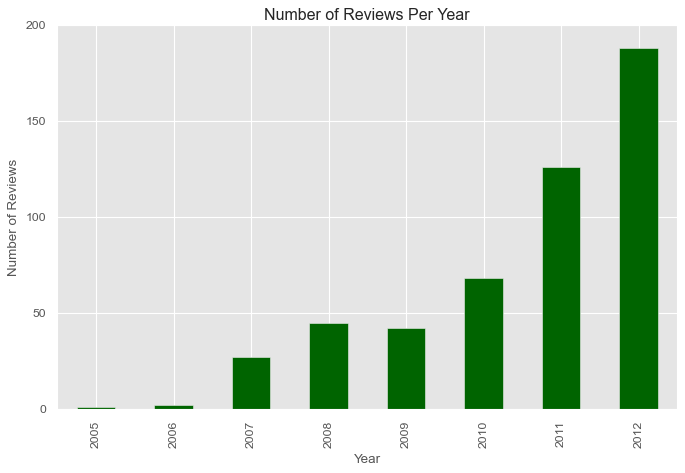

In [64]:
# Time-Based Analysis
df['Time'] = pd.to_datetime(df['Time'], unit='s')  # Convert to datetime
df['Year'] = df['Time'].dt.year

# Plot reviews over time
reviews_per_year = df.groupby('Year').size()
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='bar', color='darkgreen')
plt.title("Number of Reviews Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()

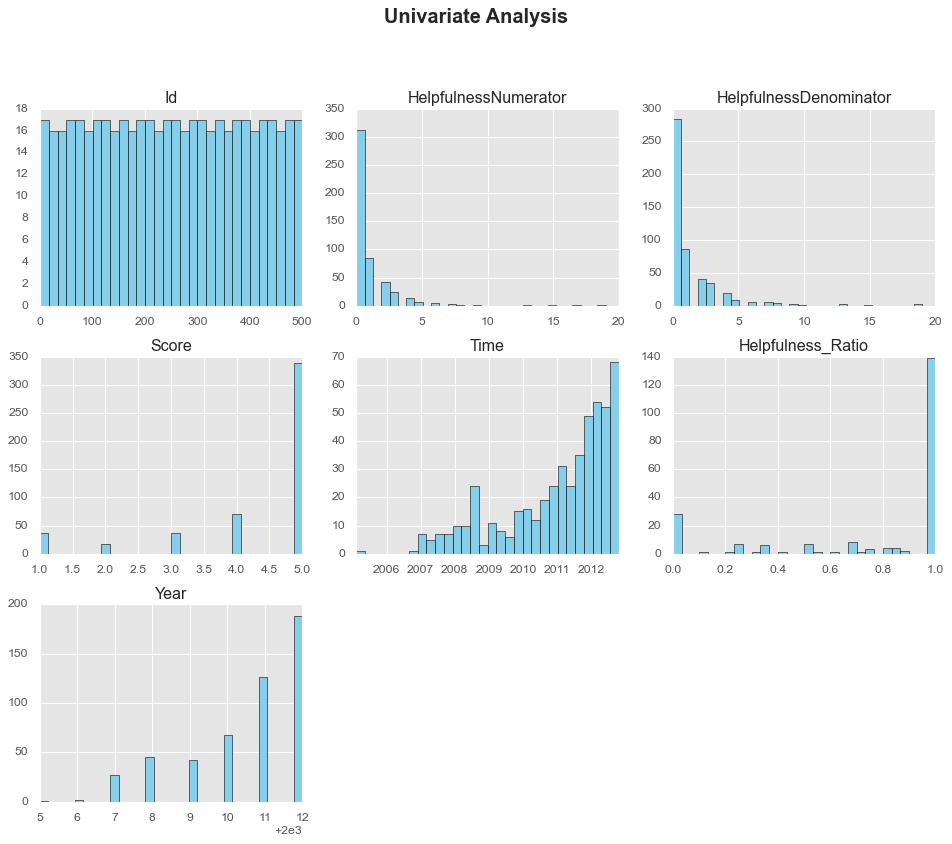

In [65]:
#Optional - Univariate Analysis
# Create histogram with better visual design
df.hist(figsize=(12, 10), bins=30, color='skyblue', edgecolor='black')

# Customize plot with titles and labels
plt.suptitle('Univariate Analysis', fontsize=18, fontweight='bold', y=1.05)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure that layout is tight and clean
plt.tight_layout()

# Show the plot
plt.show()

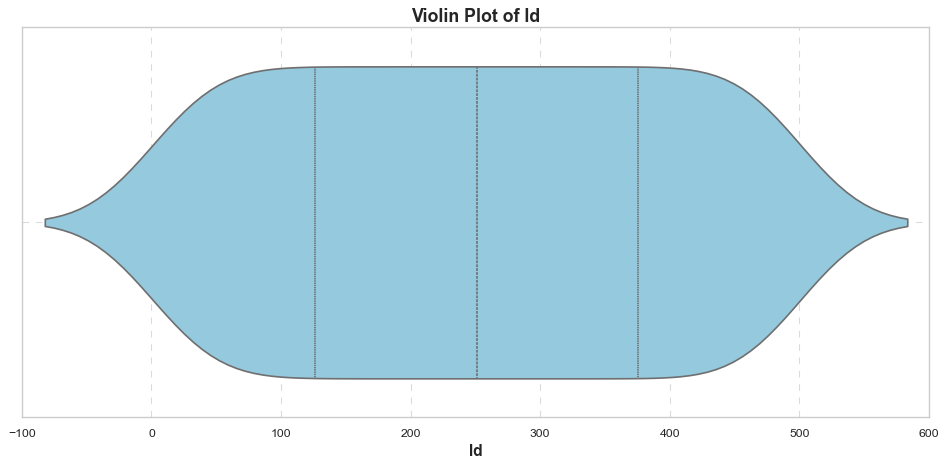

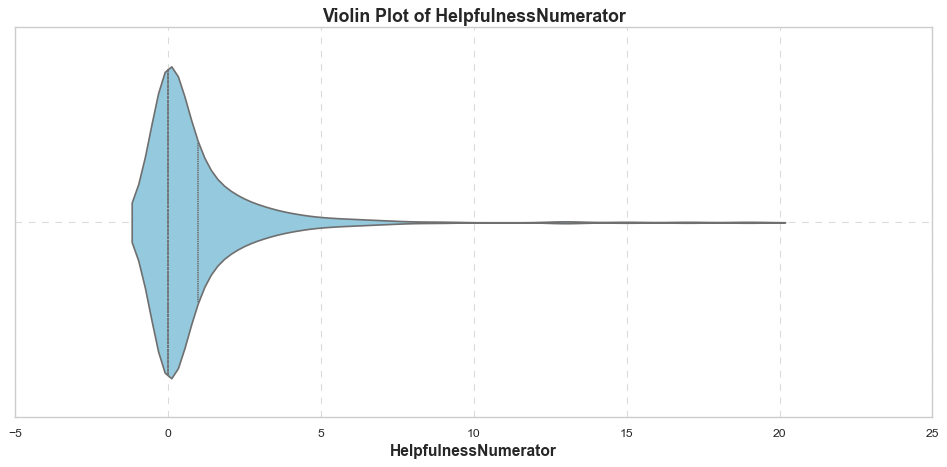

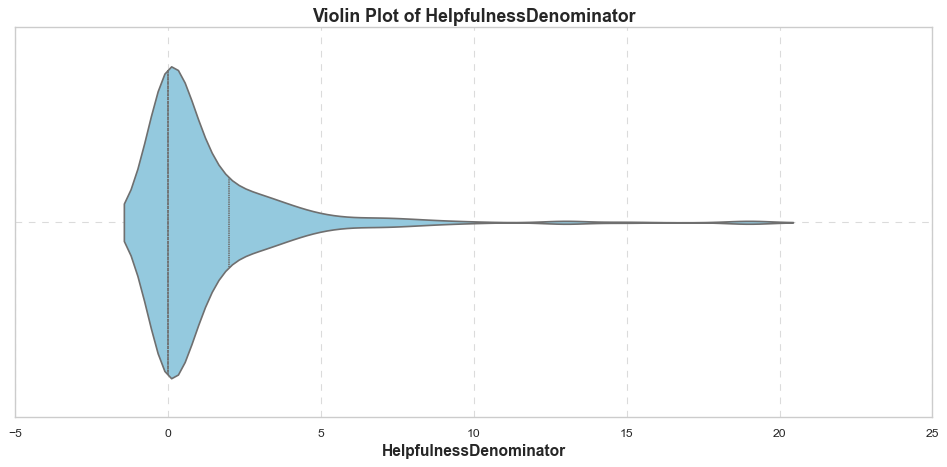

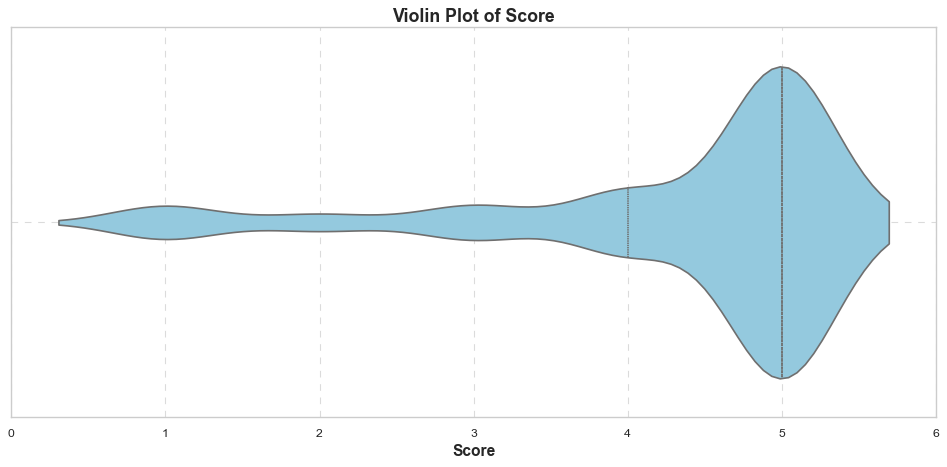

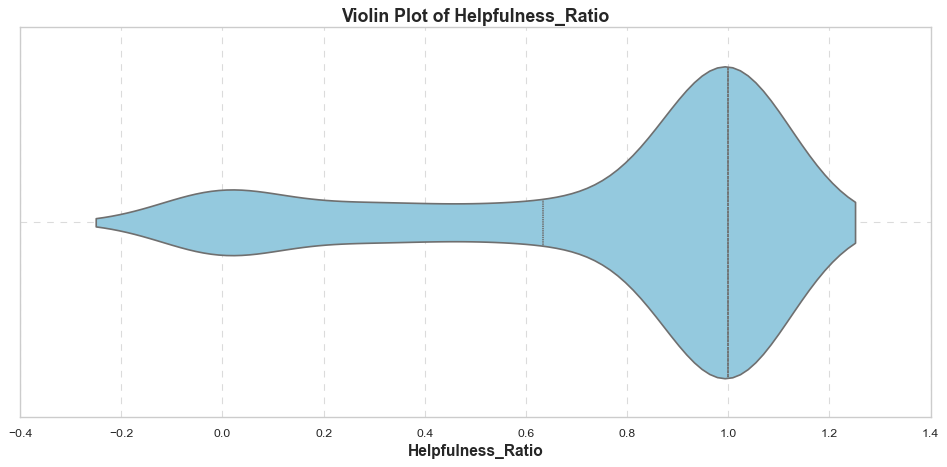

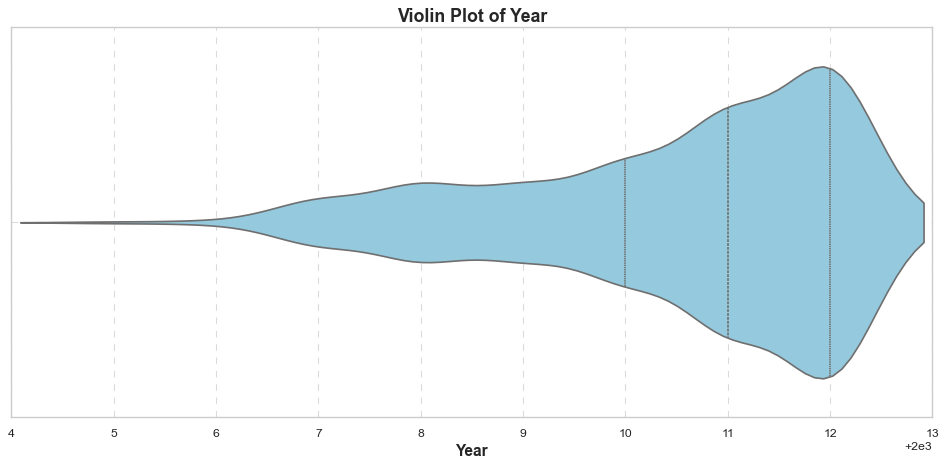

In [66]:
sns.set(style="whitegrid", palette="muted")

# Optional - Violin Plot for Distribution(Bivariate) Analysis
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(12, 6)) 
    
    # Create the violin plot with custom settings
    sns.violinplot(x=df[col], color='skyblue', inner="quart", linewidth=1.5)
    
    # Add title and labels
    plt.title(f"Violin Plot of {col}", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14, fontweight='bold')
    
    # Add gridlines for clarity
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Show plot
    plt.tight_layout()
    plt.show()

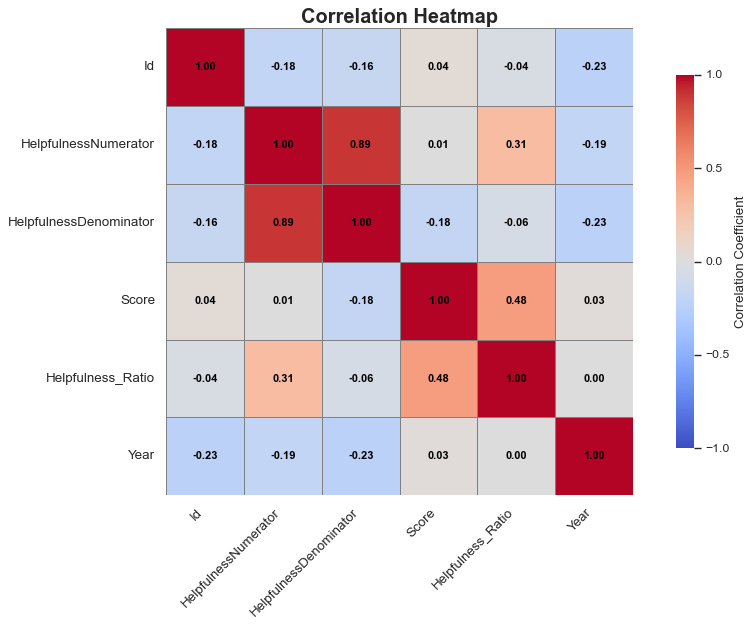

In [67]:
# Optional - Multivariate Analysis
df_numeric = df.select_dtypes(include=['number'])  # Select numeric columns
correlation = df_numeric.corr()  # Calculate correlation matrix

# Set the visual style for Seaborn
sns.set(style="white", palette="muted")

# Create the heatmap with enhancements
plt.figure(figsize=(12, 8))  # Increase figure size for clarity
sns.heatmap(
    correlation, 
    annot=True,  # Show correlation values
    cmap="coolwarm",  # Color palette for heatmap
    fmt=".2f",  # Format for annotation
    linewidths=0.5,  # Linewidth between cells
    annot_kws={"size": 10, "weight": "bold", "color": "black"},  # Styling for annotations
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},  # Customize color bar
    square=True,  # Make the heatmap square-shaped
    vmin=-1, vmax=1,  # Define correlation limits
    linecolor='gray'  # Line color between cells
)

# Title and labels with improved font size and style
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12, rotation=0)  # Keep y-axis labels horizontal

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


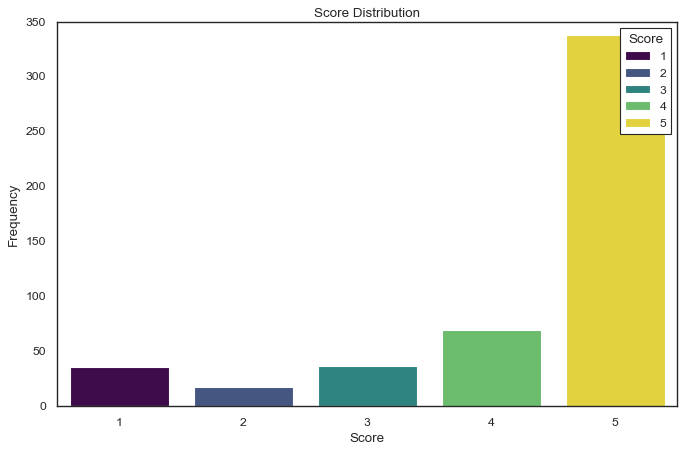

In [68]:
# Score distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=df, hue='Score', palette='viridis')
plt.title("Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

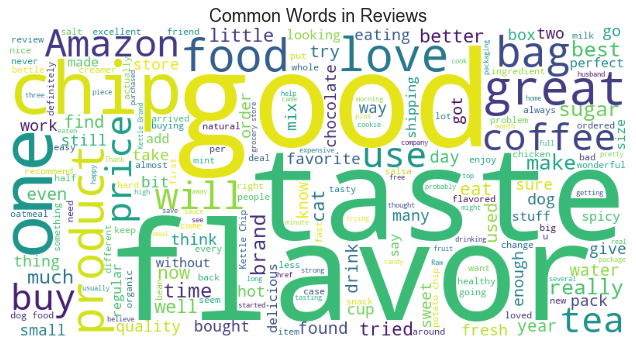

In [69]:
from wordcloud import STOPWORDS

# Custom stopwords to exclude from the wordcloud
custom_stopwords = set(STOPWORDS).union({'br', 'and', 'the', 'is', 'a', 'to'})

# Combine all the review text into a single string
review_text = " ".join(df['Text'])

# Generate the word cloud while excluding custom stopwords
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords
).generate(review_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Reviews", fontsize=16)
plt.show()


<center>
        <h3 style="font-weight: bolder; color: #26C6DA; font-size: 200%; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
            Sentiment Analysis With Vader
        </h3>
    </center>

In [71]:
analyzer = SentimentIntensityAnalyzer()

In [72]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [73]:
result = {
    row['Id']: analyzer.polarity_scores(row['Text']) 
    for _, row in tqdm(df.iterrows(), total=len(df))
}


  0%|          | 0/499 [00:00<?, ?it/s]

In [74]:
vaders = (
    pd.DataFrame(result)
    .T
    .reset_index()
    .rename(columns={'index': 'Id'})
    .merge(df, how='left')
)


In [75]:
# VADER results on example
print(example)
analyzer.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [76]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness_Ratio,Year
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,2011
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,NaN,2012
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,2008
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,2011
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,NaN,2012


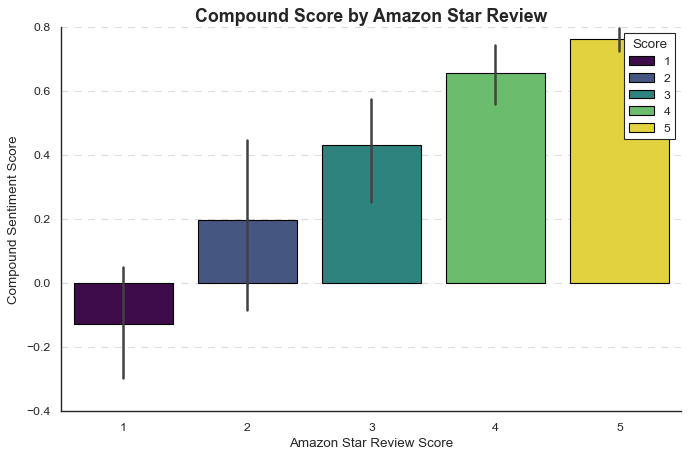

In [77]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=vaders, 
    x='Score', 
    y='compound', 
    hue='Score',
    palette='viridis', 
    edgecolor='black'
)
ax.set_title('Compound Score by Amazon Star Review', fontsize=16, fontweight='bold')
ax.set_xlabel('Amazon Star Review Score', fontsize=12)
ax.set_ylabel('Compound Sentiment Score', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


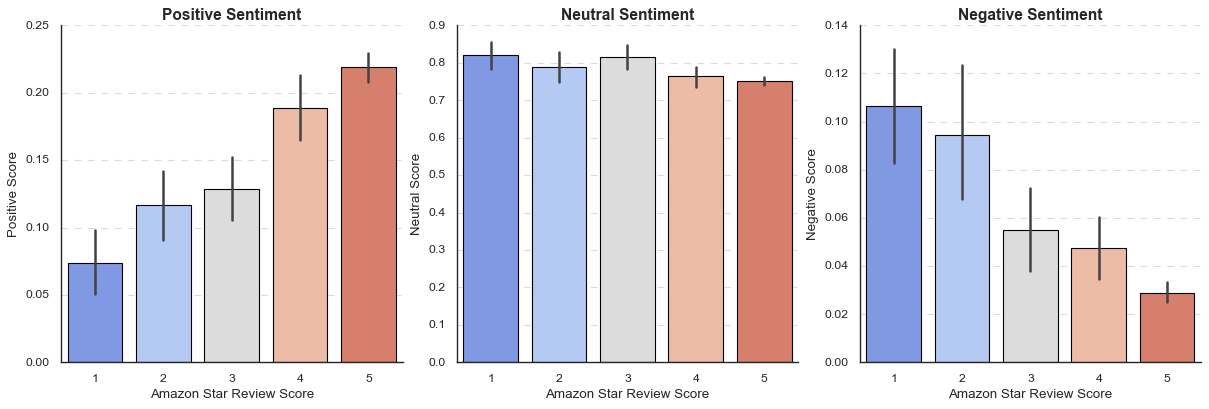

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Define a color palette for consistency
palette = sns.color_palette('coolwarm', n_colors=len(vaders['Score'].unique()))

# Plot positive scores
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0], hue='Score', palette=palette, dodge=False, edgecolor='black', legend=False)
axs[0].set_title('Positive Sentiment', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Amazon Star Review Score', fontsize=12)
axs[0].set_ylabel('Positive Score', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot neutral scores
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1], hue='Score', palette=palette, dodge=False, edgecolor='black', legend=False)
axs[1].set_title('Neutral Sentiment', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Amazon Star Review Score', fontsize=12)
axs[1].set_ylabel('Neutral Score', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot negative scores
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2], hue='Score', palette=palette, dodge=False, edgecolor='black', legend=False)
axs[2].set_title('Negative Sentiment', fontsize=14, fontweight='bold')
axs[2].set_xlabel('Amazon Star Review Score', fontsize=12)
axs[2].set_ylabel('Negative Score', fontsize=12)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Remove excess spines
for ax in axs:
    sns.despine(ax=ax)

plt.show()

<center>
        <h3 style="font-weight: bolder; color: #26C6DA; font-size: 200%; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
            Sentiment Analysis With Roberta
        </h3>
    </center>

In [79]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [80]:
# Example of Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = softmax(output[0][0].detach().numpy())

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}

print(scores_dict)


{'roberta_neg': np.float32(0.97635514), 'roberta_neu': np.float32(0.020687465), 'roberta_pos': np.float32(0.0029573678)}


In [82]:
def polarity_scores_roberta(example):
    # Get encoded text and model output
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)

    # Softmax the scores
    scores = softmax(output[0][0].detach().numpy())

    # Return the scores as a dictionary
    return {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }


In [83]:
result = {}

for i, row in tqdm(df.iterrows(), total=len(df)):
    text, myid = row['Text'], row['Id']
    
    try:
        # Get Vader sentiment scores and rename them
        vader_result_rename = {f"vader_{key}": value for key, value in analyzer.polarity_scores(text).items()}
        
        # Get Roberta sentiment scores
        roberta_result = polarity_scores_roberta(text)

        # Merge results
        result[myid] = {**vader_result_rename, **roberta_result}
        
    except RuntimeError:
        print(f'Broke for id {myid}')


  0%|          | 0/499 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [84]:
results_df = (
    pd.DataFrame(result)
    .T
    .reset_index()
    .rename(columns={'index': 'Id'})
    .merge(df, how='left')
)

In [85]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text', 'Helpfulness_Ratio', 'Year'],
      dtype='object')

<center>
        <h3 style="font-weight: bolder; color: #26C6DA; font-size: 200%; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
            Combine and compare
        </h3>
    </center>


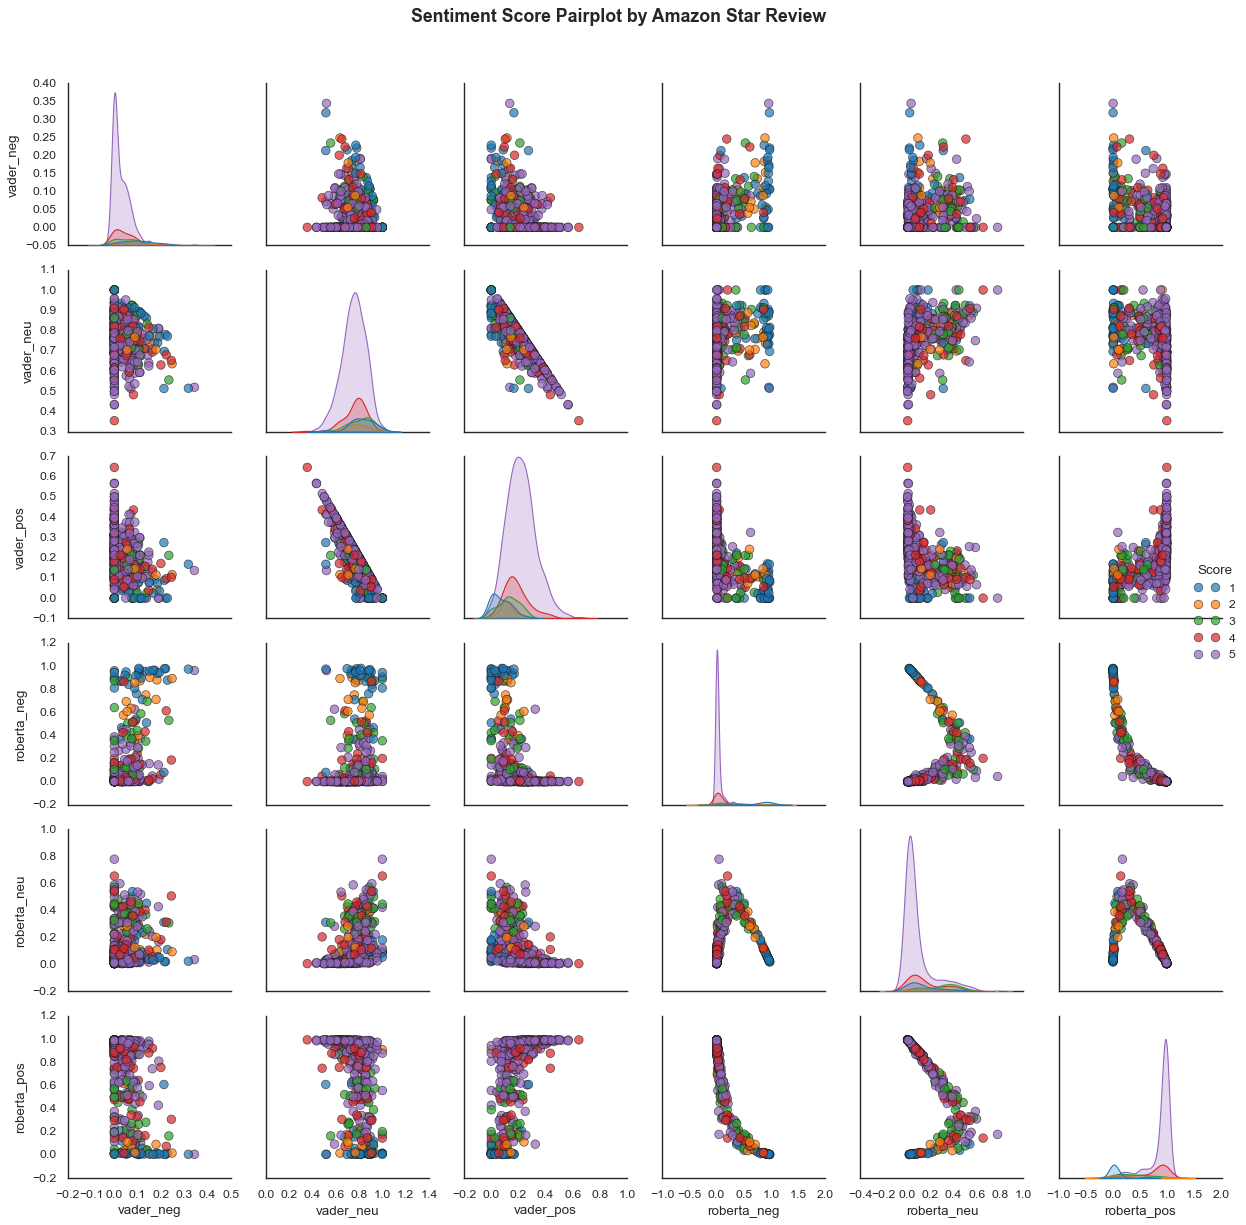

In [86]:
sns.pairplot(
    data=results_df,
    vars=['vader_neg', 'vader_neu', 'vader_pos',
          'roberta_neg', 'roberta_neu', 'roberta_pos'],
    hue='Score',
    palette='tab10',
    plot_kws={'alpha': 0.7, 's': 60, 'edgecolor': 'k'}
)

# Improve aesthetics
plt.suptitle('Sentiment Score Pairplot by Amazon Star Review', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [87]:
# Get the text with the highest roberta_pos score for Score == 1
top_roberta_text = results_df.loc[results_df['Score'] == 1]
top_roberta_text = top_roberta_text.sort_values('roberta_pos', ascending=False)['Text'].iloc[0]
print(top_roberta_text)

I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.


In [88]:
# Get the text with the highest vader_pos score for Score == 1
top_vader_text = results_df.loc[results_df['Score'] == 1]
top_vader_text = top_vader_text.sort_values('vader_pos', ascending=False)['Text'].iloc[0]
print(top_vader_text)

So we cancelled the order.  It was cancelled without any problem.  That is a positive note...


In [89]:
# Get the highest roberta_neg for negative 5-star reviews
roberta_max_neg_mismatch = results_df.loc[results_df['Score'] == 5]
roberta_max_neg_mismatch = roberta_max_neg_mismatch.sort_values('roberta_neg', ascending=False)['Text'].iloc[0]
print(roberta_max_neg_mismatch)

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


In [90]:
# Get the highest vader_neg for negative 5-star reviews
vader_max_neg_mismatch = results_df.loc[results_df['Score'] == 5]
vader_max_neg_mismatch = vader_max_neg_mismatch.sort_values('vader_neg', ascending=False)['Text'].iloc[0]
print(vader_max_neg_mismatch)

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault


<center>
        <h3 style="font-weight: bolder; color: #26C6DA; font-size: 200%; font-family: 'Poppins', sans-serif; text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.5);">
            The Transformers Pipeline
        </h3>
    </center>
# Optional 

In [91]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [92]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [5]:
sent_pipeline('This product is waste of money')

[{'label': 'NEGATIVE', 'score': 0.9998131394386292}]